In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\md\\OneDrive\\Desktop\\cereal.csv")

In [3]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0,68
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,34
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0,59
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,1,94
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,1,34


In [4]:
data.shape

(77, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      77 non-null     object
 1   mfr       77 non-null     object
 2   type      77 non-null     object
 3   calories  77 non-null     int64 
 4   protein   77 non-null     int64 
 5   fat       77 non-null     int64 
 6   sodium    77 non-null     int64 
 7   fiber     77 non-null     int64 
 8   carbo     77 non-null     int64 
 9   sugars    77 non-null     int64 
 10  potass    77 non-null     int64 
 11  vitamins  77 non-null     int64 
 12  shelf     77 non-null     int64 
 13  weight    77 non-null     int64 
 14  cups      77 non-null     int64 
 15  rating    77 non-null     int64 
dtypes: int64(13), object(3)
memory usage: 9.8+ KB


In [6]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.181818,14.623377,6.922078,96.077922,28.246753,2.207792,1.025974,0.961039,42.649351
std,19.484119,1.094790,1.006473,83.832295,2.382653,4.261328,4.444885,71.286813,22.342523,0.832524,0.160101,0.253479,14.042010
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,18.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,1.000000,33.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,1.000000,40.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,51.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,2.000000,2.000000,94.000000


In [7]:
data.dropna(inplace=True)


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [10]:
data.columns=data.columns.str.strip().str.lower()
print(data.columns)




Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


In [70]:
data['type'] = data['type'].replace({'C':'Cold','H':'Hot'})

In [71]:
data.rename(columns={'mfr':'manufacturer'}, inplace = True)

# Fat information


In [13]:
max_fat=data.groupby('name')['fat'].mean().idxmax()
print("Maximum fat is in :", max_fat)
min_fat=data.groupby('name')['fat'].mean().idxmin()
print("Minimum fat is in :", min_fat)
max_fat_value=data['fat'].max()
print("Maximum fat value is  :", max_fat_value)
min_fat_value=data['fat'].min()
print("Minimum fat value is  :", min_fat_value)  

Maximum fat is in : 100% Natural Bran
Minimum fat is in : All-Bran with Extra Fiber
Maximum fat value is  : 5
Minimum fat value is  : 0


# Calories Info

In [14]:
max_cal=data.groupby('name')['calories'].mean().idxmax()
print("Maximum calories is in :", max_cal)
min_cal=data.groupby('name')['calories'].mean().idxmin()
print("Minimum calories is in :", min_cal)
max_cal_value=data['calories'].max()
print("Maximum calories value is  :", max_cal_value)
min_cal_value=data['calories'].min()
print("Minimum calories value is  :", min_cal_value)  

Maximum calories is in : Mueslix Crispy Blend
Minimum calories is in : All-Bran with Extra Fiber
Maximum calories value is  : 160
Minimum calories value is  : 50


# Max of item

In [15]:
data.groupby('name').mean(numeric_only=True).idxmax()

calories           Mueslix Crispy Blend
protein                        Cheerios
fat                   100% Natural Bran
sodium                       Product 19
fiber         All-Bran with Extra Fiber
carbo                         Rice Chex
sugars                     Golden Crisp
potass        All-Bran with Extra Fiber
vitamins    Just Right Crunchy  Nuggets
shelf                         100% Bran
weight             Mueslix Crispy Blend
cups                                Kix
rating        All-Bran with Extra Fiber
dtype: object

# Min of item

In [16]:
data.groupby('name').mean(numeric_only=True).idxmin()

calories    All-Bran with Extra Fiber
protein                  Cap'n'Crunch
fat         All-Bran with Extra Fiber
sodium            Frosted Mini-Wheats
fiber                    Cap'n'Crunch
carbo                  Quaker Oatmeal
sugars                 Quaker Oatmeal
potass                 Almond Delight
vitamins            100% Natural Bran
shelf         Apple Cinnamon Cheerios
weight                      100% Bran
cups                        100% Bran
rating                   Cap'n'Crunch
dtype: object

# Data Visualization

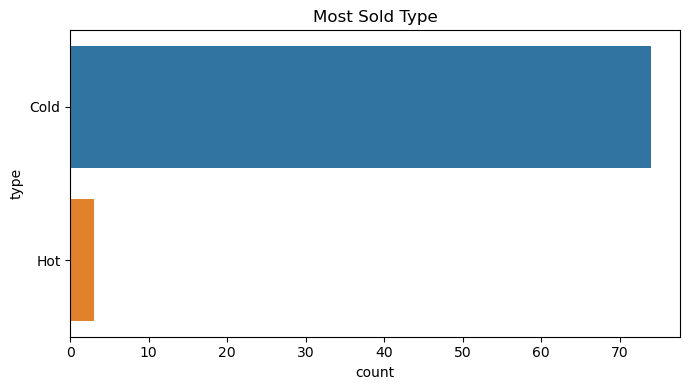

In [58]:
plt.figure(figsize=(7,4))
sns.countplot(y='type',data=data)
plt.title("Most Sold Type")
plt.tight_layout()
plt.show()
                    

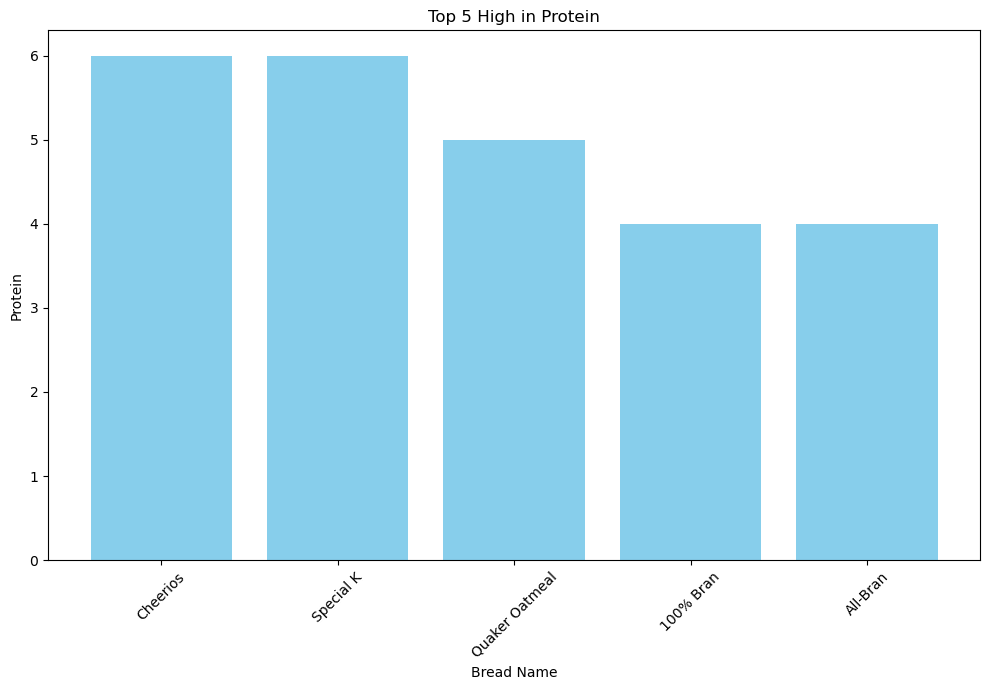

In [82]:
most_cal=data.groupby('name')['protein'].sum().nlargest(5)
plt.figure(figsize=(10, 7))
plt.bar(most_cal.index, most_cal.values, color='skyblue') 
plt.xlabel('Bread Name')
plt.ylabel('Protein')
plt.xticks(rotation=45)
plt.title('Top 5 High in Protein')
plt.tight_layout()
plt.show()


In [76]:
more_cal=data.sort_values(by='calories',ascending=False)
top_10_max=more_cal.head(10)

In [75]:
min_cal=data.sort_values(by='calories',ascending=True)
top_10_min=min_cal.head(10)

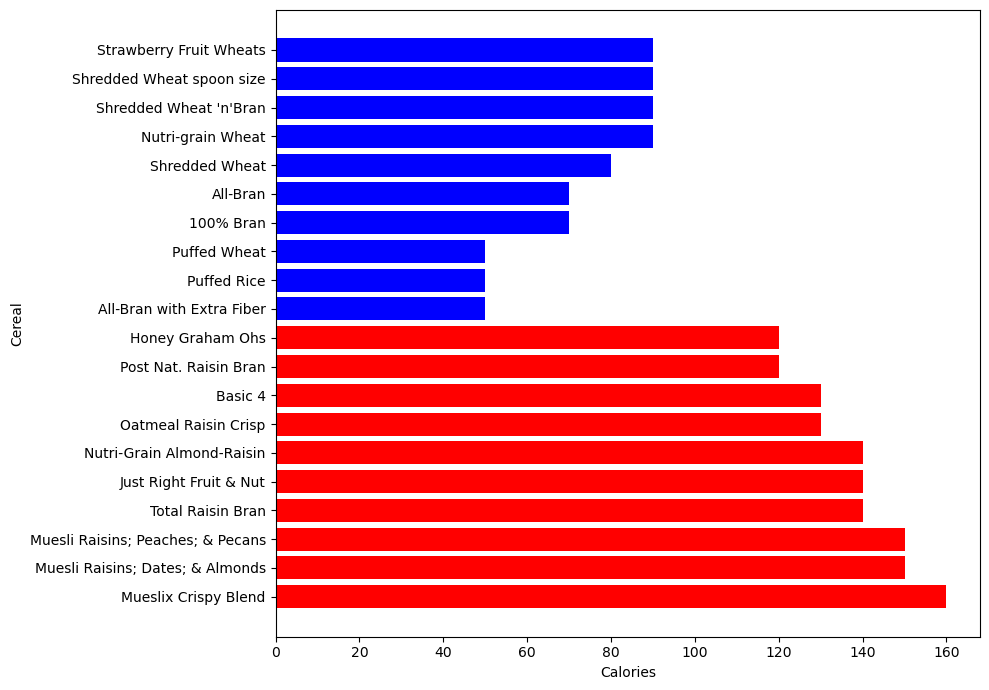

In [81]:
plt.figure(figsize=(10,7))
plt.barh(top_10_max['name'],top_10_max['calories'],color='red',label="Max Calories")
plt.barh(top_10_min['name'],top_10_min['calories'],color='blue')
plt.xlabel("Calories")
plt.ylabel("Cereal")
plt.tight_layout()
plt.show()